In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
penguins = pd.read_csv('penguins_data.csv')
penguins.sample(10)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
144,37.3,16.8,192.0,3000.0,0
3,NaN,NaN,NaN,NaN,0
244,45.5,14.5,212.0,4750.0,1
214,45.7,13.9,214.0,4400.0,1
292,50.3,20.0,197.0,3300.0,2
142,32.1,15.5,188.0,3050.0,0
103,37.8,20.0,190.0,4250.0,0
240,47.5,14.0,212.0,4875.0,1
297,48.5,17.5,191.0,3400.0,2
58,36.5,16.6,181.0,2850.0,0


In [3]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(penguins.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 37.8 17.1 186.0 3300.0 0 ] Adelie
[ 41.1 18.1 205.0 4300.0 0 ] Adelie
[ 42.0 19.5 200.0 4050.0 0 ] Adelie
[ 33.1 16.1 178.0 2900.0 0 ] Adelie
[ 46.2 14.9 221.0 5300.0 1 ] Gentoo
[ 40.6 18.8 193.0 3800.0 0 ] Adelie
[ 44.9 13.3 213.0 5100.0 1 ] Gentoo
[ 50.0 16.3 230.0 5700.0 1 ] Gentoo
[ 33.5 19.0 190.0 3600.0 0 ] Adelie
[ 41.1 19.1 188.0 4100.0 0 ] Adelie


In [4]:
# Checking for null values

penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [5]:
# Show rows containing nulls

penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


* There are two rows that contain no feature values at all (NaN stands for "not a number"), so these won't be useful in training a model.

In [6]:
# Dropping rows having null values

penguins = penguins.dropna()

# Confirming that there are no null values
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

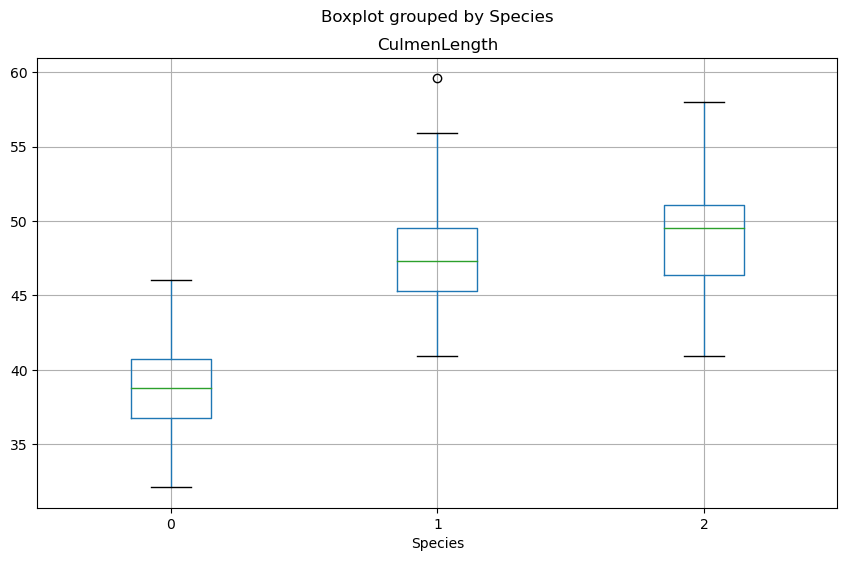

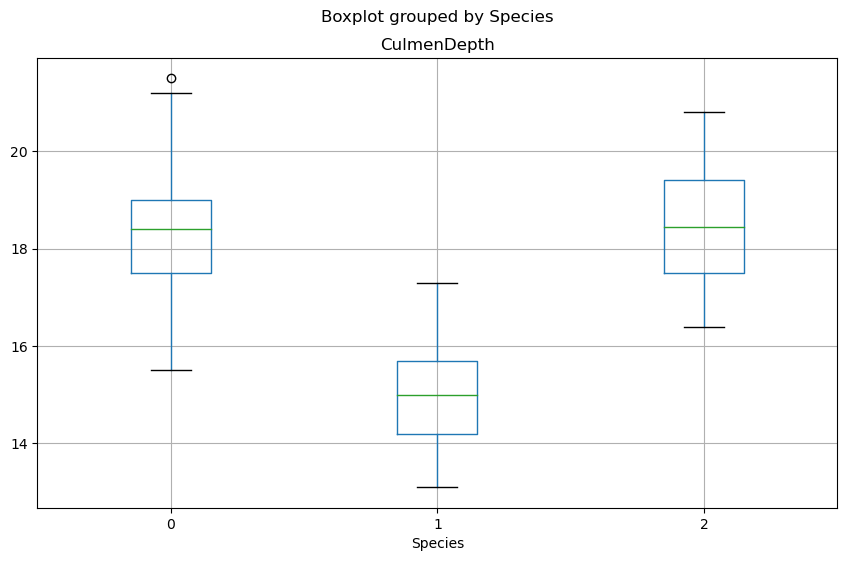

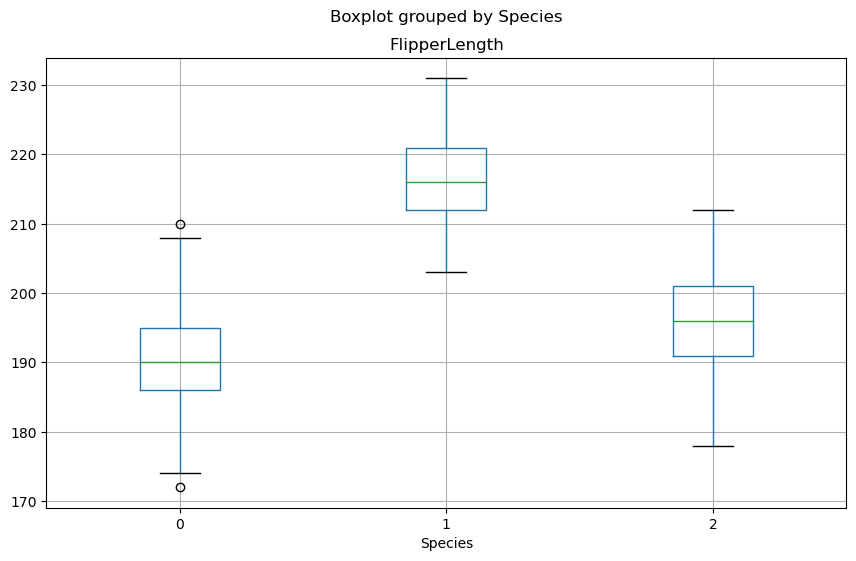

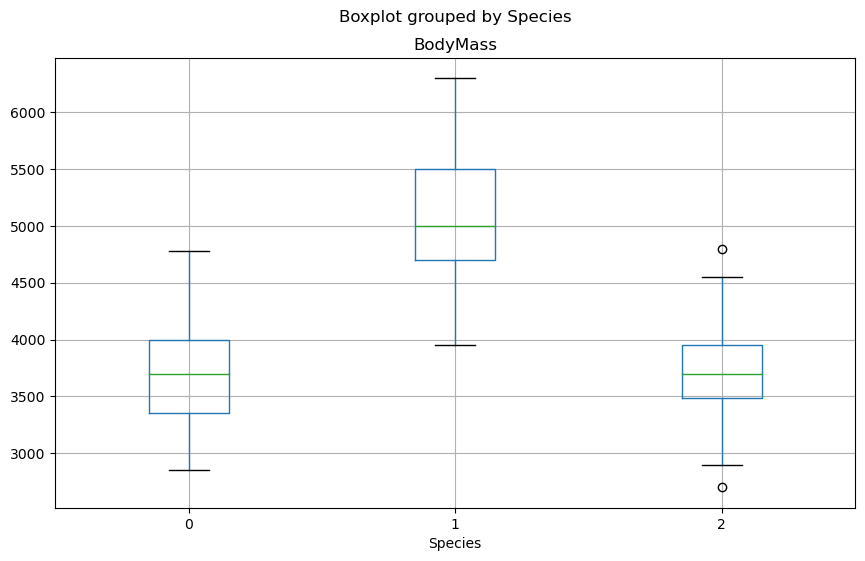

In [7]:
penguin_features =  ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_target = 'Species'

for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_target, figsize=(10,6))
    plt.title(col)
plt.show()

## Prepare the data

In [8]:
from sklearn.model_selection import train_test_split

# Seperating features and target

X, y = penguins[penguin_features].values, penguins[penguin_target].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(f'Training Set: {X_train.shape[0]}\nTest Set: {X_test.shape[0]}')

Training Set: 239
Test Set: 103


## Train and Evaluate Multiclass Classifier

In [9]:
from sklearn.linear_model import LogisticRegression

# Set Regularization rate
reg = 0.1

# Train the model
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', 
                                 multi_class='auto', max_iter=10000).fit(X_train, y_train)

print(multi_model)

LogisticRegression(C=10.0, max_iter=10000)


## Predict target

In [10]:
predictions = multi_model.predict(X_test)

print("Predicted Label: ", predictions)
print("\nActual Label: ", y_test)

Predicted Label:  [0 2 0 2 0 2 1 0 1 0 0 1 1 0 0 1 1 1 2 0 2 0 2 1 0 0 1 2 1 1 0 0 0 1 1 0 2
 1 2 0 0 0 0 1 0 0 2 1 1 2 0 0 0 0 2 0 1 0 0 2 0 0 0 1 0 0 0 1 0 1 0 2 0 0
 1 0 2 0 0 1 0 1 1 0 1 1 2 0 1 2 0 0 1 0 1 1 0 1 2 1 1 1 0]

Actual Label:  [0 2 0 2 0 2 1 0 1 0 0 1 1 0 0 1 1 1 2 0 2 0 2 1 0 0 1 2 1 1 0 0 0 1 1 0 2
 1 2 0 0 0 0 1 0 0 2 1 1 2 0 0 0 0 2 0 1 0 0 2 0 0 0 1 0 0 0 1 0 1 0 2 0 0
 1 0 2 0 0 1 0 1 1 0 1 1 2 0 1 2 0 0 1 0 1 1 0 1 2 1 1 1 0]


## Classification Report


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        18

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



* As with binary classification, the report includes precision and recall metrics for each class. However, while with binary classification we could focus on the scores for the positive class; in this case, there are multiple classes so we need to look at an overall metric (either the macro or weighted average) to get a sense of how well the model performs across all three classes.

* You can get the overall metrics separately from the report using the scikit-learn metrics score classes, but with multiclass results you must specify which average metric you want to use for precision and recall.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


In [13]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
print(mcm)

[[50  0  0]
 [ 0 35  0]
 [ 0  0 18]]


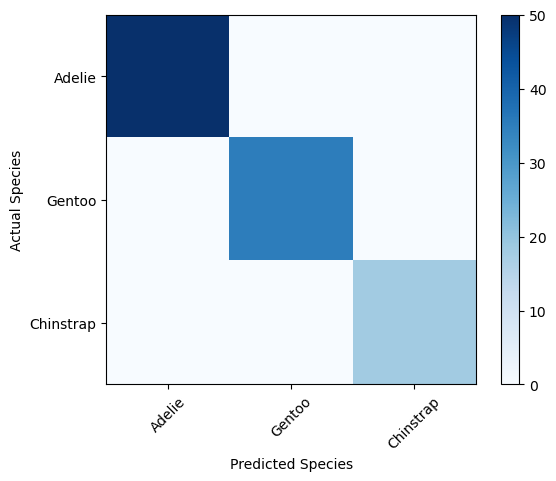

In [14]:
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

* The darker squares in the confusion matrix plot indicate high numbers of cases, and you can hopefully see a diagonal line of darker squares indicating cases where the predicted and actual label are the same.

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. However, you can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

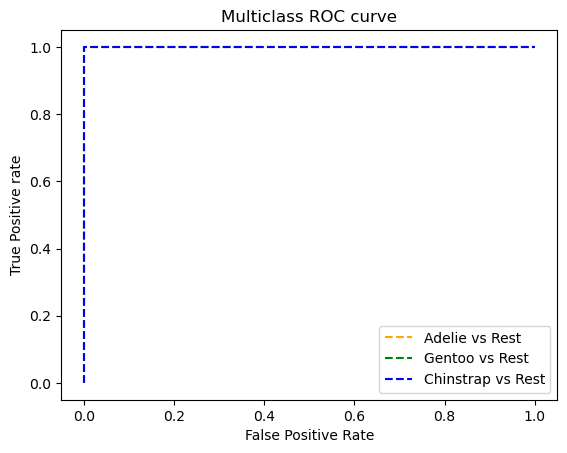

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, penguin_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

* To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.

In [16]:
auc = roc_auc_score(y_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 1.0


## Preprocess data in a pipeline

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(X_train, y_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 0.9902912621359223
Overall Precision: 0.9934640522875817
Overall Recall: 0.9814814814814815
Average AUC: 1.0


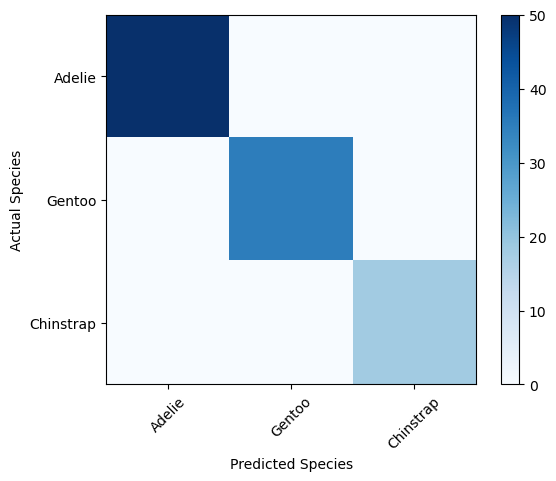

In [18]:
# Get predictions from test data
penguin_predictions = multi_model.predict(X_test)
penguin_prob = multi_model.predict_proba(X_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, penguin_predictions))
print("Overall Precision:",precision_score(y_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,penguin_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

## Saving the model

In [19]:
import joblib

filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']